In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

## Obtendo os dados

In [2]:
url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

In [4]:
df = pd.read_csv(url, names=column_names)
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [5]:
for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(f"Valores únicos: {df[coluna].unique()}")

Coluna: age
Valores únicos: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
Coluna: sex
Valores únicos: [1. 0.]
Coluna: cp
Valores únicos: [1. 4. 3. 2.]
Coluna: trestbps
Valores únicos: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
Coluna: chol
Valores únicos: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182.

In [6]:
print(df["ca"].value_counts())
print(df["thal"].value_counts())
print(df.shape)

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64
(303, 14)


In [7]:
df = df.replace('?', np.nan)
df = df.dropna()

In [8]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])
# A coluna 'target' indica a presença de doença cardíaca (0 = não, >0 = sim).
# Vamos binarizar para 0 (não) e 1 (sim).
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
# stratify=y garante que a proporção das classes em y seja a mesma em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Proporção de classes no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção de classes no teste:\n{y_test.value_counts(normalize=True)}")

Proporção de classes no treino:
target
0    0.541063
1    0.458937
Name: proportion, dtype: float64
Proporção de classes no teste:
target
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [11]:
model = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' é bom para datasets menores
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)

# Ajuda a visualizar True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(f"""
TN|FP
FN|TP
""")

[[45  3]
 [ 7 35]]

TN|FP
FN|TP



In [12]:
# Precision: Dos que o modelo previu como positivos, quantos são realmente positivos?
# TP / (TP + FP)
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision:.4f}")
print("Interpretação: Dos pacientes que nosso modelo previu terem doença cardíaca, "
      f"{precision*100:.2f}% realmente têm a doença.")


Precision: 0.9211
Interpretação: Dos pacientes que nosso modelo previu terem doença cardíaca, 92.11% realmente têm a doença.


In [13]:
# Recall (Sensibilidade): Dos que são realmente positivos, quantos o modelo conseguiu identificar?
# TP / (TP + FN)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")
print("Interpretação: De todos os pacientes que REALMENTE têm doença cardíaca, "
      f"nosso modelo identificou corretamente {recall*100:.2f}% deles.")

Recall: 0.8333
Interpretação: De todos os pacientes que REALMENTE têm doença cardíaca, nosso modelo identificou corretamente 83.33% deles.


In [14]:
print(classification_report(y_test, y_pred, target_names=['Sem Doença', 'Com Doença']))
#Compare Precision e Recall. Um valor alto em um pode significar um valor baixo no outro,
#dependendo do threshold e do objetivo do problema. Para detecção de doenças, Recall costuma ser muito importante.

              precision    recall  f1-score   support

  Sem Doença       0.87      0.94      0.90        48
  Com Doença       0.92      0.83      0.88        42

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



In [15]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC (Area Under the Curve): {roc_auc:.4f}")
print("Interpretação: Um AUC de 1.0 significa um modelo perfeito, 0.5 significa aleatório. "
      f"Nosso modelo tem uma boa capacidade de discriminação com AUC de {roc_auc:.4f}.")

AUC (Area Under the Curve): 0.9459
Interpretação: Um AUC de 1.0 significa um modelo perfeito, 0.5 significa aleatório. Nosso modelo tem uma boa capacidade de discriminação com AUC de 0.9459.


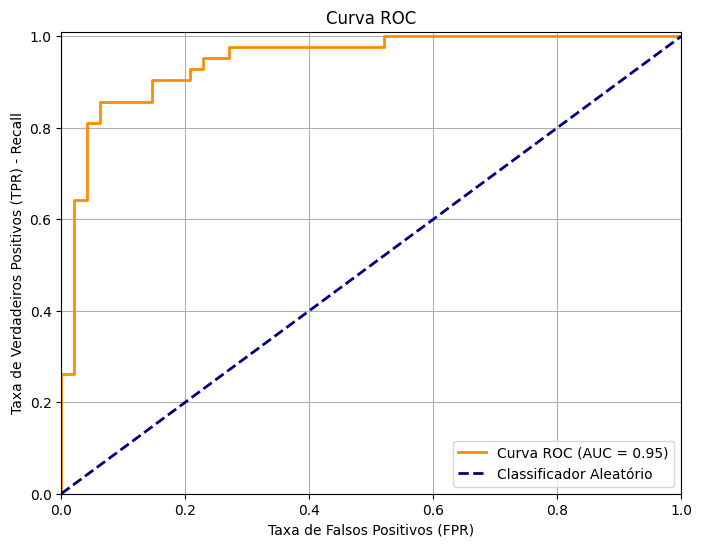

In [16]:
# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [17]:
# Número de folds (partições)
n_splits = 5
# Criando um objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Avaliando a acurácia do modelo em cada fold
# cross_val_score retorna a pontuação (score) para cada fold.
# Por padrão, para modelos de classificação, o score é a acurácia.
cv_scores_accuracy = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f"\nAcurácia em cada fold (Validação Cruzada): {cv_scores_accuracy}")


Acurácia em cada fold (Validação Cruzada): [0.88333333 0.85       0.81355932 0.83050847 0.83050847]


In [18]:
# Podemos avaliar outras métricas também, como Precision, Recall ou AUC.
cv_scores_precision = cross_val_score(model, X, y, cv=skf, scoring='precision')
cv_scores_recall = cross_val_score(model, X, y, cv=skf, scoring='recall')
cv_scores_roc_auc = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
print(f"\nMédia da Precision (Validação Cruzada): {cv_scores_precision.mean():.4f}")
print(f"Média do Recall (Validação Cruzada): {cv_scores_recall.mean():.4f}")
print(f"Média do AUC (Validação Cruzada): {cv_scores_roc_auc.mean():.4f}")


Média da Precision (Validação Cruzada): 0.8584
Média do Recall (Validação Cruzada): 0.7873
Média do AUC (Validação Cruzada): 0.8907


In [20]:
model_grid = LogisticRegression(random_state=42, solver='liblinear')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Diferentes forças de regularização
    'penalty': ['l1', 'l2'] # Tipos de regularização
}

print(f"\nHiperparâmetros que serão testados no grid: {param_grid}")
print("O GridSearchCV testará TODAS as combinações possíveis dentro deste grid.")

# Inicializando GridSearchCV
grid_search = GridSearchCV(estimator=model_grid,
                           param_grid=param_grid,
                           cv=skf, # Reutilizamos o StratifiedKFold definido anteriormente
                           scoring='roc_auc', # Otimizar pela Área Sob a Curva ROC
                           verbose=1, # Para ver o progresso da busca
                           n_jobs=-1) # Usa todos os núcleos da CPU para acelerar
print(f"Média da Acurácia (Validação Cruzada): {cv_scores_accuracy.mean():.4f}")
print(f"Desvio Padrão da Acurácia: {cv_scores_accuracy.std():.4f}")

grid_search.fit(X, y)

print(grid_search.best_params_)

print("**Melhor Pontuação (AUC) com esses Hiperparâmetros (Média da Validação Cruzada):**")
print(f"{grid_search.best_score_:.4f}")
best_model = grid_search.best_estimator_
print("\n**O Melhor Modelo Otimizado (best_estimator_):**")
print(best_model)


Hiperparâmetros que serão testados no grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
O GridSearchCV testará TODAS as combinações possíveis dentro deste grid.
Média da Acurácia (Validação Cruzada): 0.8416
Desvio Padrão da Acurácia: 0.0239
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'penalty': 'l2'}
**Melhor Pontuação (AUC) com esses Hiperparâmetros (Média da Validação Cruzada):**
0.8930

**O Melhor Modelo Otimizado (best_estimator_):**
LogisticRegression(C=10, random_state=42, solver='liblinear')


In [21]:
# Faremos previsões com o melhor modelo encontrado pelo GridSearchCV no conjunto de TESTE original
# para uma avaliação final do seu desempenho.
y_pred_optimized = best_model.predict(X_test)
y_pred_proba_optimized = best_model.predict_proba(X_test)[:, 1]

# Métricas para o modelo otimizado
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_optimized)
roc_auc_opt = auc(fpr_opt, tpr_opt)

print(f"Precision do Modelo Otimizado: {precision_opt:.4f}")
print(f"Recall do Modelo Otimizado: {recall_opt:.4f}")
print(f"AUC do Modelo Otimizado: {roc_auc_opt:.4f}")

Precision do Modelo Otimizado: 0.9211
Recall do Modelo Otimizado: 0.8333
AUC do Modelo Otimizado: 0.9568
